# TP 1 ALC

**Integrantes: Facundo Solar, Ignacio Rodriguez Sañudo, Manuel Horn**

In [ ]:
import numpy as np
from scipy import linalg

1)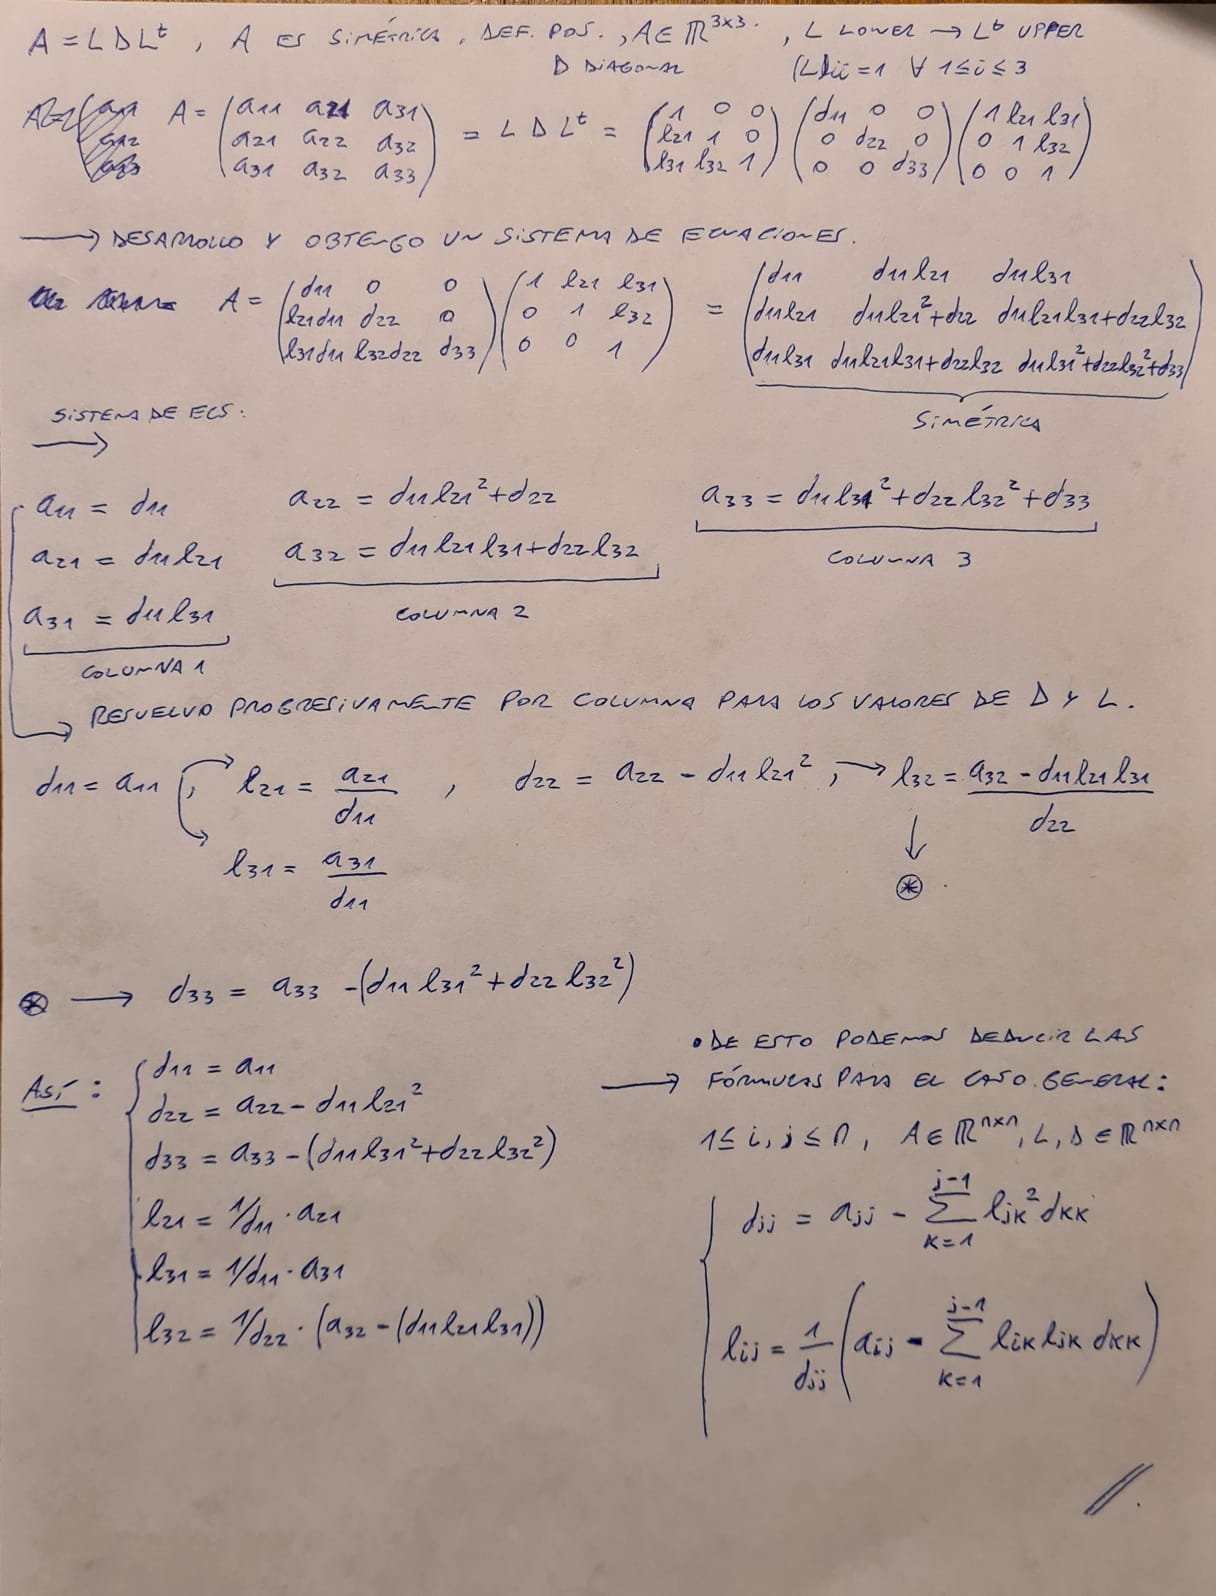

2)

In [ ]:
def LU(A):

  filas  = np.shape(A)[0]
  columnas = np.shape(A)[1]

  L = np.eye(filas)
  
  B = A.copy() #guardo la matriz de input xq sino puedo descomponer me va a pedir q la devuelva como estaba
  P = L.copy()

  for j in range(columnas):
    if(B[j,j] != 0):
      for i in range(j+1, filas):
        factor = B[i,j]/B[j,j]
        L[i,j] = factor
        B[i,:] = B[i,:] - B[j,:] * factor
      
    elif(B[j,j] == 0 and np.any(B[(j+1):,j] != 0)): 
      print('Error: aparece un pivote nulo')
      return A,P
      #No hace falta el break, el return ya lo termina

  return L,B



In [ ]:
A = np.matrix([[12,2,4],[12,2,4],[1,2,7]])
A

matrix([[12,  2,  4],
        [12,  2,  4],
        [ 1,  2,  7]])

In [ ]:
LU(A)

Error: aparece un pivote nulo


(matrix([[12,  2,  4],
         [12,  2,  4],
         [ 1,  2,  7]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

3)

In [ ]:
def resolver_triangular_sup(U, b):
  n = U.shape[0]
  x = np.zeros(n)
  for i in range(n-1,-1,-1):
    temp = 0
    for j in range(i+1,n):
      temp += U[i,j]*x[j]
    x[i] = (b[i] - temp)/U[i,i]
  return x

def resolver_triangular_inf(L, b):
  n = L.shape[0]
  x = np.zeros(n)
  for i in range(n):
    temp = 0
    for j in range(i):
      temp += L[i,j]*x[j]
    x[i] = (b[i] - temp)/L[i,i]
  return x

4)

In [ ]:
A = np.random.rand(10,10)

b = np.random.rand(10)

In [ ]:
def resolverLU(A, b):
  L, U = LU(A)
  #Ly = b
  y = resolver_triangular_inf(L, b)

  #Ux = y
  x = resolver_triangular_sup(U, y)

  return x

In [ ]:
x = resolverLU(A, b)

In [ ]:
A@x

array([0.8921027 , 0.67353785, 0.18191407, 0.29062121, 0.59900344,
       0.04044807, 0.50629974, 0.73532742, 0.46275117, 0.9554582 ])

In [ ]:
b

array([0.8921027 , 0.67353785, 0.18191407, 0.29062121, 0.59900344,
       0.04044807, 0.50629974, 0.73532742, 0.46275117, 0.9554582 ])

In [ ]:
e = A@x - b 

In [ ]:
np.linalg.norm(e, ord=1)

9.658940314238862e-15

5) 

**Pre:** A es definida positiva (--> hermitiana(/sim))

**Post:** L y D de descomposición A = L* D *(L^t)

In [ ]:
def sumaLDL(L, D, i, j): #i, j es la posición en A
  sum = 0
  for k in range(j):
    sum += L[i,k]*L[j,k]*D[k,k]
  
  return sum

In [ ]:
def desc_LDL(A):
  I = np.eye(A.shape[0])
  L = I.copy()
  L_T = I.copy()
  D = I.copy()

  for i in range(A.shape[0]):
    for j in range(i+1):
      D[j,j] = A[j,j] - sumaLDL(L,D,j,j)
      L[i,j] = (1/D[j,j])*(A[i,j] - sumaLDL(L,D,i,j))
      L_T[j,i] = L[i,j]
  
  return (L, D, L_T)

In [ ]:
A1 = np.array([[4, 2, -2],
               [2, 5, 5],
               [-2, 5, 11]])

tup = desc_LDL(A1)

In [ ]:
print(tup)

(array([[ 1. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ],
       [-0.5,  1.5,  1. ]]), array([[4., 0., 0.],
       [0., 4., 0.],
       [0., 0., 1.]]), array([[ 1. ,  0.5, -0.5],
       [ 0. ,  1. ,  1.5],
       [ 0. ,  0. ,  1. ]]))


In [ ]:
(tup[0]@tup[1])@tup[2]

array([[ 4.,  2., -2.],
       [ 2.,  5.,  5.],
       [-2.,  5., 11.]])

6) Pre: D diagonal (d en Rn es mejor), len(d) == len(b)

Notar que si d tiene un valor 0 puede pasar que sea incompatible o compatible indeterminado

Post: x en Rn, resultado de Dx = b

In [ ]:
def solDiagonal(d, b):
  x = np.zeros(d.shape)

  if(0 in d):
    return('Existen infinitas soluciones o ninguna')
  else:
    for i in range(len(d)):
      x[i] = b[i]/d[i]
    return x

In [ ]:
#ejemplo

d = np.array([2,9,1])
b = np.array([6,0,8])

In [ ]:
solDiagonal(d,b)

array([3., 0., 8.])

7)

$Q = A^TA$

A es invertible $ =>  Ax = 0 <=> x = 0 $

$x^T(A^TA)x = (x^TA^T)(Ax) = (Ax)^T(Ax) = $$ \| Ax \|^2 $$ > 0;   ∀x 	\neq  0   $ 

8)

In [ ]:
A = np.random.random((10, 10)) #tiene que ser inversible

In [ ]:
b = np.random.random((10))

In [ ]:
Q = A@A.T

In [ ]:
L, D, Lt = desc_LDL(Q)

In [ ]:
D

array([[2.94900995, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.73476313, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.19942078, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57687981, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.04629281,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16723265, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83794271, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
L2, U = LU(Q)

In [ ]:
D

array([[2.94900995, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.73476313, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.19942078, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57687981, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.04629281,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16723265, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83794271, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.61230447,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.05820077, -0.11057548,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.94656111,  0.6651575 ,  0.6904354 ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.72195482, -0.02295494,  0.66022371, -0.0600417 ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.90749424,  0.35057595,  0.16245547,  0.26918485,  0.26661672,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.82764097,  0.20665324,  0.66808537, -0.70047961,  0.13729283,
        -0.34732977,  1.        ,  0.        

In [ ]:
L2

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.61230447,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.05820077, -0.11057548,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.94656111,  0.6651575 ,  0.6904354 ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.72195482, -0.02295494,  0.66022371, -0.0600417 ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.90749424,  0.35057595,  0.16245547,  0.26918485,  0.26661672,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.82764097,  0.20665324,  0.66808537, -0.70047961,  0.13729283,
        -0.34732977,  1.        ,  0.        

In [ ]:
#resuelve Qx = b haciendo Q = (LDL^t) x = b

def resolverLDL(Q, b):
  (L, D, Lt) = desc_LDL(Q)
  z = resolver_triangular_inf(L, b)
  dDiag = np.diag(D)
  y = solDiagonal(dDiag, z)
  x = resolver_triangular_sup(Lt, y)

  return x

In [ ]:
x = resolverLDL(Q, b)

In [ ]:
np.linalg.norm((Q@x - b), ord=1)

6.539213615042172e-14

9)

In [ ]:
LU(Q)

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.61230447,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.05820077, -0.11057548,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.94656111,  0.6651575 ,  0.6904354 ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.72195482, -0.02295494,  0.66022371, -0.0600417 ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.90749424,  0.35057595,  0.16245547,  0.26918485,  0.26661672,
          1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.82764097,  0.20665324,  0.66808537, -0.70047961,  0.13729283,
         -0.34732977,  1.       

Ejemplo de 3x3

In [ ]:
A1 = np.array([[5.,0.,1.],
               [1.,1.,2.],
               [2.,1.,3.]])

In [ ]:
Q1 = A1.T @ A1
Q1

array([[30.,  3., 13.],
       [ 3.,  2.,  5.],
       [13.,  5., 14.]])

In [ ]:
Qldl = desc_LDL(Q1)
luQ = LU(Q1)

In [ ]:
print(Qldl[0])
print(luQ[0])

[[1.         0.         0.        ]
 [0.1        1.         0.        ]
 [0.43333333 2.17647059 1.        ]]
[[1.         0.         0.        ]
 [0.1        1.         0.        ]
 [0.43333333 2.17647059 1.        ]]


In [ ]:
print(Qldl[1]@Qldl[2])
print(luQ[1])

[[30.          3.         13.        ]
 [ 0.          1.7         3.7       ]
 [ 0.          0.          0.31372549]]
[[30.          3.         13.        ]
 [ 0.          1.7         3.7       ]
 [ 0.          0.          0.31372549]]


In [ ]:
print(Qldl[0]@Qldl[1]@Qldl[2])
print(luQ[0]@luQ[1])

[[30.  3. 13.]
 [ 3.  2.  5.]
 [13.  5. 14.]]
[[30.  3. 13.]
 [ 3.  2.  5.]
 [13.  5. 14.]]


**Observaciones:** L de LU coindice con L de LDLt y U de LU coincide con DLt de LDLt

10)

In [ ]:
def construir_matriz(Q, n):
  #Genera una matriz colocando las primeras n columnas al final
  B = np.zeros(Q.shape)
  B[:,:n] = Q[:,n:]
  B[:,n:] = Q[:,:n]
  return B

In [ ]:
W = construir_matriz(Q, 5)

In [ ]:
L,U = LU(W)
b = np.random.rand(10)

In [ ]:
#Ly = b
y = resolver_triangular_inf(L, b)

#Ux = y
x = resolver_triangular_sup(U, y)

In [ ]:
e = W@x - b
np.linalg.norm(e, ord=1)


1.0835776720341528e-13

El error menor viene de hacer la descomposición LDLt

11)

In [ ]:
np.linalg.cond(Q, p=1)

5209.3736192859305

In [ ]:
np.linalg.cond(W, p=1)

5209.373619286035

$W = Q P $ 

$Cond_{1}(W) = $$ \| W \|_{1} $ $ \| W ^{-1}\|_{1} $

$  W ^{-1} = (QP)^{-1} = P^{-1}Q^{-1} = PQ^{-1} $ 

 $ \| W \|_{1} = \| QP \|_{1} = \| Q \|_{1} $ P intercambia columnas.

 $ \| W ^{-1} \|_{1} = \| PQ^{-1} \|_{1} = \| Q^{-1} \|_{1} $ P intercambia filas.

 $ \implies  Cond_{1}(W) = Cond_{1}(Q)$ 

Las condiciones de W y Q son iguales.

12)

In [ ]:
sumaQ = 0
sumaW = 0

for i in range(100):
  A = np.random.rand(100,100) #Genera matriz aleatoria 100x100
  b = np.random.rand(100)     #Genera vector aleatorio 100
  
  Q = A.T @ A                 
  x = resolverLDL(Q, b)
  e = Q@x - b
  norma_1Q = np.linalg.norm(e, ord=1)

  W = construir_matriz(Q, 50)
  x = resolverLU(W, b)
  e = W@x - b
  norma_1W = np.linalg.norm(e, ord=1)
  
  sumaQ += norma_1Q
  sumaW += norma_1W

error_promedioQ = sumaQ/100
error_promedioW = sumaW/100

In [ ]:
error_promedioQ

2.629402325771135e-07

In [ ]:
error_promedioW

2.4920353084401105e-06

Se obtiene un error promedio menor con la matriz Q definida positiva. Coincide con lo esperado.